In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('cleaned_merged_labbeled_newspaper_data.csv')
data.head(5)

,Unnamed: 0,event_id,article_title,article_link,article_content,publishing_date,article_image,article_keywords,article_relevance,Country,category
0,0,DR-2011-000121-CHN,"Water and Food Security: Somalia Famine Grows,...",https://www.circleofblue.org/2011/world/water-...,Meteorologists are hopeful for future rainfall...,"Wed, 07 Sep 2011 07:00:00 GMT",https://i2.wp.com/www.circleofblue.org/wp-cont...,"['grows', 'drought', 'somalia', 'niÃ±a', 'secu...",NaN,China,drought
1,1,DR-2011-000121-CHN,On Yunnanâs chromium trail - chinadialogue,https://chinadialogue.net/en/pollution/4493-on...,"In mid-August, the Yunnan-based blogger Dong R...","Tue, 30 Aug 2011 07:00:00 GMT",https://cdn.chinadialogue.net/content/uploads/...,"['chromium', 'dumped', 'tailings', 'luliang', ...",NaN,China,none
2,2,DR-2011-000121-CHN,West east|Life|chinadaily.com.cn - China Daily,http://www.chinadaily.com.cn/cndy/2011-08/30/c...,West east Updated: 2011-08-30 07:51 (China Dai...,"Tue, 30 Aug 2011 07:00:00 GMT",http://www.chinadaily.com.cn/cndy/attachement/...,"['chinese', 'chinadailycomcn', 'way', 'parents...",NaN,China,none
3,3,DR-2011-000121-CHN,Firm to get skyscraper project off the ground|...,https://www.chinadaily.com.cn/china/2011-09/06...,Firm to get skyscraper project off the ground ...,"Tue, 06 Sep 2011 07:00:00 GMT",https://www.chinadaily.com.cn/china/images/att...,"['tallest', 'office', 'china', 'ground', 'proj...",NaN,China,none
4,4,DR-2011-000121-CHN,Public storm in Dalian - chinadialogue,https://chinadialogue.net/en/pollution/4511-pu...,As Typhoon Meihua battered Chinaâs east coas...,"Tue, 06 Sep 2011 07:00:00 GMT",https://cdn.chinadialogue.net/content/uploads/...,"['management', 'public', 'groups', 'social', '...",NaN,China,none


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3911 non-null   int64  
 1   event_id           3910 non-null   object 
 2   article_title      3910 non-null   object 
 3   article_link       3909 non-null   object 
 4   article_content    3669 non-null   object 
 5   publishing_date    3858 non-null   object 
 6   article_image      3615 non-null   object 
 7   article_keywords   3903 non-null   object 
 8   article_relevance  0 non-null      float64
 9   Country            3902 non-null   object 
 10  category           3306 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 336.2+ KB


In [36]:
data['category'].isna().sum()

605

In [37]:
data = data.dropna(subset=['category'])

In [38]:
data['category'].isna().sum()

0

In [39]:
data = data[['article_content', 'category']]
data.head(5)

,article_content,category
0,Meteorologists are hopeful for future rainfall...,drought
1,"In mid-August, the Yunnan-based blogger Dong R...",none
2,West east Updated: 2011-08-30 07:51 (China Dai...,none
3,Firm to get skyscraper project off the ground ...,none
4,As Typhoon Meihua battered Chinaâs east coas...,none


In [40]:
data.category.value_counts()

flood            2196
none              961
drought            71
flood_drought      70
tree                8
Name: category, dtype: int64

In [41]:
data.drop( data[ data['category'] == 'none' ].index, inplace=True)

In [42]:
data.category.value_counts()

flood            2196
drought            71
flood_drought      70
tree                8
Name: category, dtype: int64

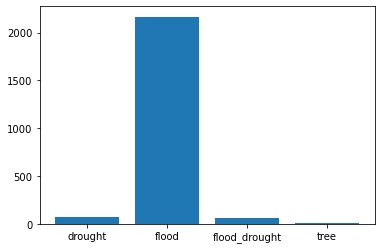

In [43]:
Category_count=data.groupby('category').count()
plt.bar(Category_count.index.values, Category_count['article_content'])
plt.show()

## Feature Generation using Bag of Words

In the Text Classification Problem, we have a set of texts and their respective labels ('category' in this case). But we directly can't use text for our model. We need to convert these text into some numbers or vectors of numbers.

### We can generate document term matrix by using scikit-learn's CountVectorizer :

In [44]:
data['article_content']

0       Meteorologists are hopeful for future rainfall...
5       News note\n\nUNICEF strengthens water delivery...
10      The blistering heat experienced by the United ...
13      2 dead in Texas wildfires, homes destroyed Upd...
32      (CNN) -- The summer of 2011 was the second hot...
                              ...                        
3903    Data Hub Gone with floods: Rising Lake Victori...
3904    By LUKE ANAMI\n\nThis year has so far seen the...
3905    This story originally appeared in EOS.org and ...
3907    A poor start to the rainy season has resulted ...
3910    HIGHLIGHTS\n\nÃ¢?Â¢ More than 160,000 people, ...
Name: article_content, Length: 2345, dtype: object

In [45]:
data.head(5)

,article_content,category
0,Meteorologists are hopeful for future rainfall...,drought
5,News note\n\nUNICEF strengthens water delivery...,drought
10,The blistering heat experienced by the United ...,drought
13,"2 dead in Texas wildfires, homes destroyed Upd...",drought
32,(CNN) -- The summer of 2011 was the second hot...,drought


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
#transform
text_counts = cv.fit_transform(data['article_content'].values.astype('U'))

In [50]:
#create dataframe
frequency_matrix = pd.DataFrame(text_counts.toarray(),index=data.article_content,
                                columns = cv.get_feature_names())
frequency_matrix

0  00  000  0000  000hhs  \
article_content                                                                
Meteorologists are hopeful for future rainfall,...  0   0    0     0       0   
News note\n\nUNICEF strengthens water delivery ...  0   0    2     0       0   
The blistering heat experienced by the United S...  3   0    0     0       0   
2 dead in Texas wildfires, homes destroyed Upda...  0   0    8     0       0   
(CNN) -- The summer of 2011 was the second hott...  0   0    0     0       0   
...                                                ..  ..  ...   ...     ...   
Data Hub Gone with floods: Rising Lake Victoria...  0   0    2     0       0   
By LUKE ANAMI\n\nThis year has so far seen the ...  0   0    0     0       0   
This story originally appeared in EOS.org and i...  0   0    3     0       0   
A poor start to the rainy season has resulted i...  0   0    0     0       0   
HIGHLIGHTS\n\nÃ¢?Â¢ More than 160,000 people, i...  0   0    6     0       0   

                                                    000kg  000km  000mm  \
article_content                                                           
Meteorologists are hopeful for future rainfall,...      0      0      0   
News note\n\nUNICEF strengthens water delivery ...      0      0      0   
The blistering heat experienced by the United S...      0      0      0   
2 dead in Texas wildfires, homes destroyed Upda...      0      0      0   
(CNN) -- The summer of 2011 was the second hott...      0      0      0   
...                                                   ...    ...    ...   
Data Hub Gone with floods: Rising Lake Victoria...      0      0      0   
By LUKE ANAMI\n\nThis year has so far seen the ...      0      0      0   
This story originally appeared in EOS.org and i...      0      0      0   
A poor start to the rainy season has resulted i...      0      0      0   
HIGHLIGHTS\n\nÃ¢?Â¢ More than 160,000 people, i...      0      0      0   

                                                    000tn  002  ...  \
article_content                                                 ...   
Meteorologists are hopeful for future rainfall,...      0    0  ...   
News note\n\nUNICEF strengthens water delivery ...      0    0  ...   
The blistering heat experienced by the United S...      0    0  ...   
2 dead in Texas wildfires, homes destroyed Upda...      0    0  ...   
(CNN) -- The summer of 2011 was the second hott...      0    0  ...   
...                                                   ...  ...  ...   
Data Hub Gone with floods: Rising Lake Victoria...      0    0  ...   
By LUKE ANAMI\n\nThis year has so far seen the ...      0    0  ...   
This story originally appeared in EOS.org and i...      0    0  ...   
A poor start to the rainy season has resulted i...      0    0  ...   
HIGHLIGHTS\n\nÃ¢?Â¢ More than 160,000 people, i...      0    0  ...   

                                                    zq3w9sfnhi  zuba  zubair  \
article_content                                                                
Meteorologists are hopeful for future rainfall,...           0     0       0   
News note\n\nUNICEF strengthens water delivery ...           0     0       0   
The blistering heat experienced by the United S...           0     0       0   
2 dead in Texas wildfires, homes destroyed Upda...           0     0       0   
(CNN) -- The summer of 2011 was the second hott...           0     0       0   
...                                                        ...   ...     ...   
Data Hub Gone with floods: Rising Lake Victoria...           0     0       0   
By LUKE ANAMI\n\nThis year has so far seen the ...           0     0       0   
This story originally appeared in EOS.org and i...           0     0       0   
A poor start to the rainy season has resulted i...           0     0       0   
HIGHLIGHTS\n\nÃ¢?Â¢ More than 160,000 people, i...           0     0       0   

                                                    zubairu  zuhaib  z

### Split train and test set :

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['category'], test_size=0.2, random_state=21)

### Model Building and Evaluation :

In [48]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

In [49]:
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy : ",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy :  0.9381663113006397


In [53]:
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[  6   3   3   0]
 [  2 430  10   0]
 [  1   8   4   0]
 [  0   1   1   0]]


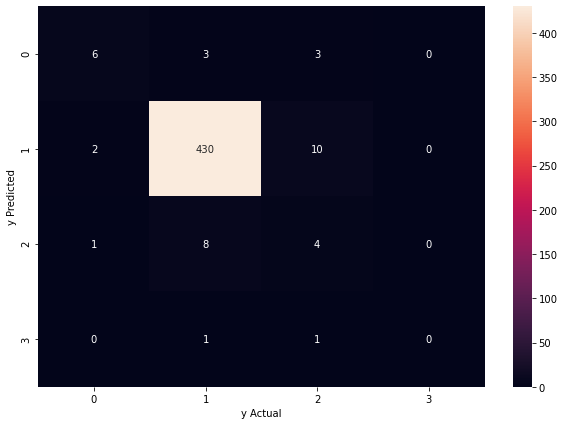

In [52]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Actual')
plt.ylabel('y Predicted')
plt.show()